<a href="https://colab.research.google.com/github/jroasch/Asignaci-n-Dise-o-de-Experimentos-Pr-ctica-Python/blob/main/TALLER_DISE%C3%91O.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



**Integrantes:**

*   Johan S. Rojas Ch.
*   Juan S. Rodriguez A.



**Asignación: Diseño de Experimentos/ Práctica Python**

El siguiente conjunto de datos agronómicos permite usar la misma entrada para ajustar diferentes modelos haciendo uso esta vez del programa Python usando cualquier plataforma.

La matriz de datos contiene las variables

y: Latitud

x: Longitud

SMI: Índice de humedad del suelo

NDVI: Indice de vegetación de diferencia normalizado

LST: Temperatura en la superficie del suelo

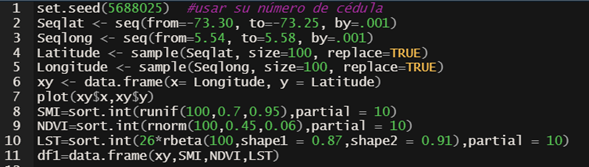

In [ ]:
from scipy.stats import shapiro
import mpl_toolkits
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from random import sample
import random as rd
import scipy as sc
import folium
from matplotlib.lines import Line2D
from folium.map import Popup
from matplotlib import style
import seaborn as sns
import statsmodels.api as sm
from mpl_toolkits import mplot3d
import plotly.express as px
from scipy.spatial import distance_matrix
from statsmodels.formula.api import ols

1-	Convertir el código R en Python para generar un data.frame de manera análoga.

[-73.257 -73.265 -73.256 -73.274 -73.292 -73.284 -73.261 -73.276 -73.289
 -73.251 -73.297 -73.282 -73.293 -73.286 -73.264 -73.288 -73.297 -73.29
 -73.288 -73.286 -73.289 -73.265 -73.263 -73.293 -73.257 -73.276 -73.252
 -73.261 -73.263 -73.286 -73.289 -73.26  -73.267 -73.255 -73.282 -73.28
 -73.272 -73.282 -73.283 -73.294 -73.278 -73.26  -73.267 -73.263 -73.275
 -73.296 -73.273 -73.269 -73.254 -73.273 -73.253 -73.279 -73.256 -73.261
 -73.277 -73.258 -73.265 -73.273 -73.273 -73.299 -73.27  -73.255 -73.255
 -73.275 -73.263 -73.261 -73.255 -73.252 -73.281 -73.281 -73.29  -73.272
 -73.282 -73.258 -73.258 -73.285 -73.262 -73.287 -73.283 -73.272 -73.273
 -73.257 -73.284 -73.298 -73.264 -73.293 -73.262 -73.271 -73.299 -73.293
 -73.26  -73.254 -73.299 -73.297 -73.285 -73.291 -73.29  -73.292 -73.268
 -73.263]
        x       y
0   5.569 -73.257
1   5.553 -73.265
2   5.563 -73.256
3   5.547 -73.274
4   5.563 -73.292
..    ...     ...
95  5.550 -73.291
96  5.566 -73.290
97  5.550 -73.292
98  5.574

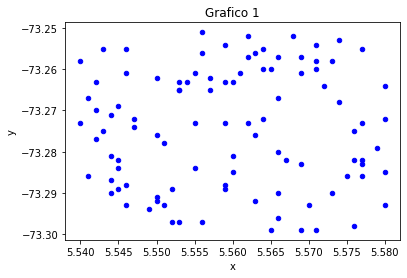

        x       y       SMI      NDVI        LST
0   5.569 -73.257  0.701240  0.068727   0.377220
1   5.553 -73.265  0.700785  0.077106   0.327405
2   5.563 -73.256  0.704603  0.084295   0.074571
3   5.547 -73.274  0.713394  0.069076   0.375995
4   5.563 -73.292  0.708999  0.074359   0.486059
..    ...     ...       ...       ...        ...
95  5.550 -73.291  0.776736  0.338732  24.856347
96  5.566 -73.290  0.738945  0.391137  10.322428
97  5.550 -73.292  0.763085  0.282101  22.275480
98  5.574 -73.268  0.773156  0.418809   7.154586
99  5.559 -73.263  0.867538  0.381981   7.542557

[100 rows x 5 columns]


In [ ]:
rd.seed(1003540900)
seqlat = np.arange(-73.30, -73.25, 0.001)
seqlong = np.arange(5.54, 5.58, 0.001)
latitude = np.random.choice(seqlat, size=100, replace=True)
longitude = np.random.choice(seqlong, size=100, replace=True)
print(latitude)
data = {
  "x": longitude,
  "y": latitude
}
xy = pd.DataFrame(data)
print(xy)
xy.plot(kind = 'scatter',
        x = 'x',
        y = 'y',
        color = 'blue')

plt.title('Grafico 1')
plt.show()
SMI = np.partition(np.random.uniform(0.7,0.95,100), 10)
NDVI = np.partition(np.random.uniform(0.45,0.06,100), 10)
LST = np.partition(26* sc.stats.beta.rvs(0.87,0.91, size=100), 10)
data2 = {
  "x": xy['x'],
  "y": xy['y'],
  "SMI": SMI,
  "NDVI": NDVI,
  "LST": LST
}
df1 = pd.DataFrame(data2)
print(df1)

2-	Graficar la nube de puntos (solo coordenadas).

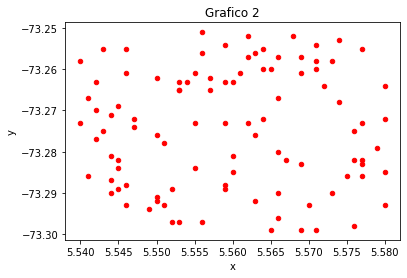

In [ ]:
df1.plot(kind = 'scatter',
        x = 'x',
        y = 'y',
        color = 'red'
         )
plt.title('Grafico 2')
plt.show()

3-	Asignar al gráfico un tamaño al punto de acuerdo con el SMI (graficar).

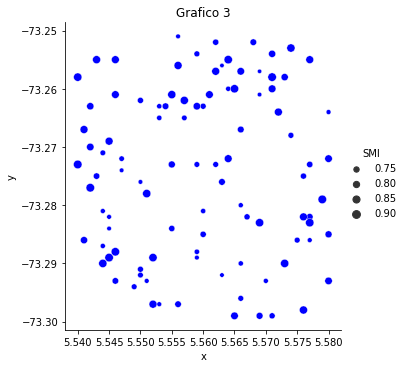

In [ ]:
sns.relplot(x="x",
            y="y", 
            size = "SMI",
            color= 'Blue', 
            data = df1)
plt.title('Grafico 3')
plt.show()


Se observan algunos valores alto para el SMI, sin embargo están muy dispersos. Muy variables entre sí

4-	Asignar al gráfico un color al punto de acuerdo con el NDVI (graficar)

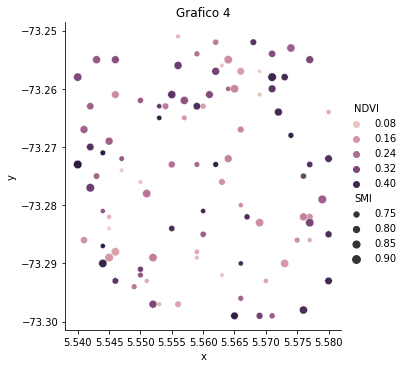

In [ ]:
sns.relplot(data = df1,
                 x="x",
            y="y", 
            hue = "NDVI",
            size = "SMI"
            )
plt.title('Grafico 4')
plt.show()

El índice de vegetación de diferencia normalizado parece ser alto en diferentes regiones, pero no hay un área determinada para estos valores, aunque se pueden observar una acumulación de valores más altos en la parte de arriba de la gráfica.

5-	Asignar al gráfico una forma al punto de acuerdo con el LST(graficar)

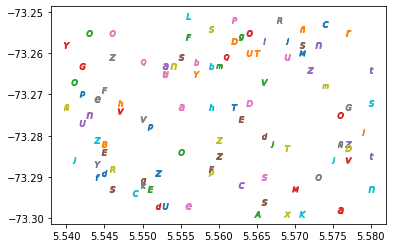

In [ ]:
chars = "ABCDEFGHIJKLMNÑOPQRSTUVXYZabcdefghijklmnñopqrstuvxyz"
form = []

for j in range(100):
  form.append('$'+rd.choice(chars)+'$')

for i in range(len(df1['LST'])):
  plt.scatter(df1['x'][i], df1['y'][i], marker=form[i])
plt.show()

6-	Buscar alguna librería o programa(en última opción) que permita visualizar los puntos en el mapa de Colombia (¿están todos los puntos en Colombia? ¿pertenecen los puntos a alguna región específica de Colombia? ¿están todos los puntos dentro de esa región? Si alguno se sale de esa región (departamento), decartarlo y volver a graficar. 

In [ ]:
Map = folium.Map(location= [5.559000000000006,-73.27099999999986],zoom_start=13)
for i in range(len(df1['x'])):
  folium.Marker(
      location= [df1['x'][i],df1['y'][i]],
      popup=f"x:{df1['x'][i]}, y:{df1['y'][i]}" ,
      icon= folium.Icon()
      ).add_to(Map) 
Map

Se observa que la distribución de los puntos (variables) están dentro del municipio de Chivatá en donde se encuentran cerca la ciudad de Tunja y el municipio de Oicatá, así como de Siachoque. Todos los puntos están dentro de Colombia, en la región del altiplano cundiboyacense. 

7-	Realice un boxplot para SMI

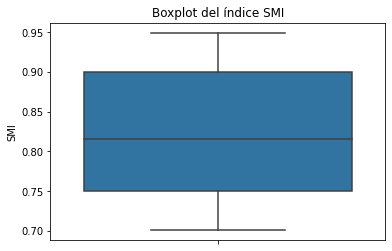

In [ ]:
box1 = sns.boxplot(data = df1, y = 'SMI')
plt.title('Boxplot del índice SMI')
box1

No se observan datos atípicos para SMI.

8-	Realice un histograma para NDVI

(array([ 8.,  9., 12., 10.,  5., 14.,  8.,  8., 14., 12.]),
 array([0.06090912, 0.09822675, 0.13554438, 0.17286201, 0.21017964,
        0.24749727, 0.2848149 , 0.32213253, 0.35945016, 0.39676779,
        0.43408542]),
 <a list of 10 Patch objects>)

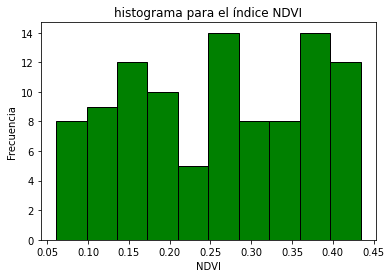

In [ ]:
his = plt.hist(df1['NDVI'], 
         color = "green", 
         ec= "black")
plt.xlabel('NDVI',fontsize=10)
plt.ylabel('Frecuencia',fontsize=10)
plt.title('histograma para el índice NDVI')
his

La forma del histograma se asemeja a una distribución bimodal, o incluso positiva. Sin embargo, no hay una uniformidad dentro de los datos que nos permita concluir esta distribución.

9-	Grafique la densidad para LST

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



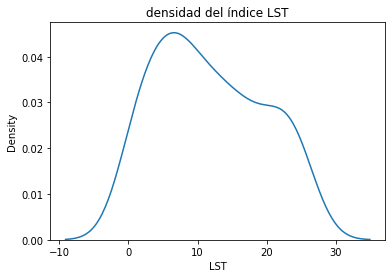

In [ ]:
sns.distplot(df1['LST'],hist=False)
plt.title('densidad del índice LST')
plt.show()


Se observa una distribución negativa para la densidad del índice LST.

10-	Calcule estadísticas descriptivas para las 3 variables

In [ ]:
med_NDVI = df1['NDVI'].mean()
desv_NDVI = df1['NDVI'].std()
medn_NDVI = df1['NDVI'].median()

print("Estadisticas descripticas de NDVI")
print("   1. Media")
print(med_NDVI)
print("   2. Desviación estandar")
print(desv_NDVI)
print("   3. Mediana")
print(medn_NDVI)

Estadisticas descripticas de NDVI
   1. Media
0.257825626042988
   2. Desviación estandar
0.11060342477150352
   3. Mediana
0.26450585289572703


In [ ]:
med_LST = df1['LST'].mean()
desv_LST = df1['LST'].std()
medn_LST = df1['LST'].median()

print("Estadisticas descripticas de LST")
print("   1. Media")
print(med_LST)
print("   2. Desviación estandar")
print(desv_LST)
print("   3. Mediana")
print(medn_LST)

Estadisticas descripticas de LST
   1. Media
11.743948604330177
   2. Desviación estandar
7.678355512418067
   3. Mediana
10.850597870880321


In [ ]:
med_SMI = df1['SMI'].mean()
desv_SMI = df1['SMI'].std()
medn_SMI = df1['SMI'].median()

print("Estadisticas descripticas de SMI")
print("   1. Media")
print(med_SMI)
print("   2. Desviación estandar")
print(desv_SMI)
print("   3. Mediana")
print(medn_SMI)

Estadisticas descripticas de SMI
   1. Media
0.8230751745969692
   2. Desviación estandar
0.08014007259040071
   3. Mediana
0.8158133082957548


In [ ]:
df1[{'SMI', 'NDVI', 'LST'}].describe()

,NDVI,LST,SMI
count,100.000000,100.000000,100.000000
mean,0.257826,11.743949,0.823075
std,0.110603,7.678356,0.080140
min,0.060909,0.074571,0.700785
25%,0.166301,5.414680,0.749870
50%,0.264506,10.850598,0.815813
75%,0.361476,18.303133,0.900492
max,0.434085,25.731820,0.949283


En este caso no se pueden comparar las medias debido a que son variables diferentes. Se observa que los datos de la temperatura en la superfice del suelo toma valores altos, posiblemente debido a la naturaleza de estos datos.

11-	Fracciones los datos de latitud en 4 cuadrantes y etiquete los puntos como (I,II,II y IV) según el cuadrante y cree esta nueva variable(cuadrante como tipo factor o cadena) y calcule las estadísticas descriptivas por cuadrante

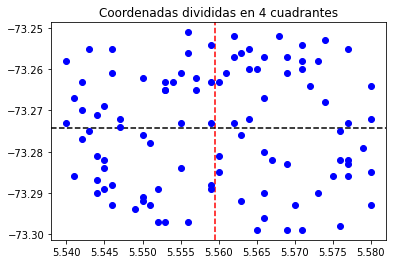

In [ ]:
lonmedia = np.mean(xy['x'])
latmedia = np.mean(xy['y'])
plt.axvline(x=lonmedia, color="red", linestyle="--")
plt.axhline(y=latmedia, color="black", linestyle="--")
plt.plot(xy['x'], xy['y'], 'bo')
plt.title('Coordenadas divididas en 4 cuadrantes')
plt.show()

In [ ]:
print(lonmedia)
print(latmedia)

5.559570000000005
-73.27436999999988


In [ ]:
conditions = [
    (xy['x'] > lonmedia) & (xy['y'] > latmedia),
    (xy['x'] < lonmedia) & (xy['y'] > latmedia),
    (xy['x'] < lonmedia) & (xy['y'] < latmedia),
    (xy['x'] > lonmedia) & (xy['y'] < latmedia)
    ]

fac = ['I', 'II', 'III', 'IV']

xy['factor'] = np.select(conditions, fac)

xy['smi']= SMI
xy['ndvi']= NDVI
xy['lst']= LST

print(xy)

        x       y factor       smi      ndvi        lst
0   5.569 -73.257      I  0.701240  0.068727   0.377220
1   5.553 -73.265     II  0.700785  0.077106   0.327405
2   5.563 -73.256      I  0.704603  0.084295   0.074571
3   5.547 -73.274     II  0.713394  0.069076   0.375995
4   5.563 -73.292     IV  0.708999  0.074359   0.486059
..    ...     ...    ...       ...       ...        ...
95  5.550 -73.291    III  0.776736  0.338732  24.856347
96  5.566 -73.290     IV  0.738945  0.391137  10.322428
97  5.550 -73.292    III  0.763085  0.282101  22.275480
98  5.574 -73.268      I  0.773156  0.418809   7.154586
99  5.559 -73.263     II  0.867538  0.381981   7.542557

[100 rows x 6 columns]


Estadísticas descriptivas por cuadrante

In [ ]:
 xy.groupby(['factor']).describe()


x                      ...        lst                      
       count      mean       std  ...        50%        75%        max
factor                            ...                                 
I       26.0  5.568654  0.005973  ...   8.942201  18.134946  24.788570
II      26.0  5.549962  0.006557  ...  11.022552  20.290550  25.731820
III     24.0  5.548833  0.005189  ...  10.398990  16.021819  25.659451
IV      24.0  5.570875  0.006375  ...  11.844060  15.702553  23.092013

[4 rows x 40 columns]

Se observan una mayor concentración de datos en el cuadrante II y en el cuadrante I. Sin embargo, los datos se encuentran muy dispersos y no se observa que alguno tienda a su media en cada cuadrante.

12-	Realice un boxplot para SMI que muestre las cajas de los 4 cuadrantes en el mismo gráfico

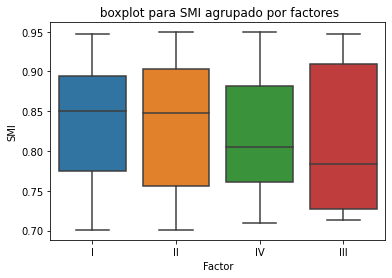

In [ ]:
sns.boxplot(data=xy, x='factor', y='smi')
plt.ylabel('SMI')
plt.xlabel('Factor')
plt.title(' boxplot para SMI agrupado por factores')
plt.show()

No se observan datos atípicos para los cuatro cuadrantes en SMI.

13-	Realice un histograma múltiple para NDVI que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo los histogramas)

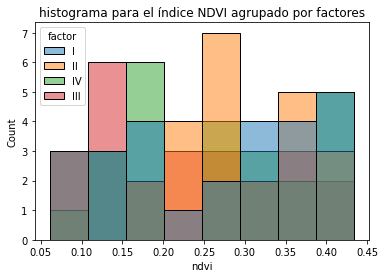

In [ ]:
xy.groupby('factor')
his2 = sns.histplot(data=xy,x="ndvi", hue="factor")
plt.title('histograma para el índice NDVI agrupado por factores')
his2

14-	Realice un gráfico de densidades múltiple para LST que los muestre para los 4 cuadrantes en el mismo gráfico (superponiendo las densidades)

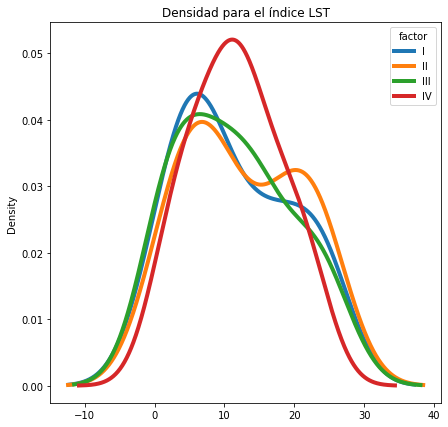

In [ ]:
dfLST=xy.pivot(columns='factor', values='lst') 

den2 = dfLST.plot.density(figsize = (7, 7), 
                       linewidth = 4) 
plt.title('Densidad para el índice LST')
den2

15-	Construya una matriz de correlaciones de Pearson para las 5 variables


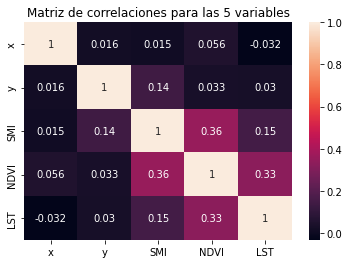

In [ ]:
correlation_mat = df1.corr()

sns.heatmap(correlation_mat, annot = True)
plt.title('Matriz de correlaciones para las 5 variables')
plt.show()


Una correlación positiva nos dice que las variables se mueven en la misma dirección; mientras que una correlación negativa indica que las variables se mueven en la dirección opuesta.

16-	Realice un gráfico de correlaciones para las 5 variables.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f94d7a25310>,
      dtype=object)

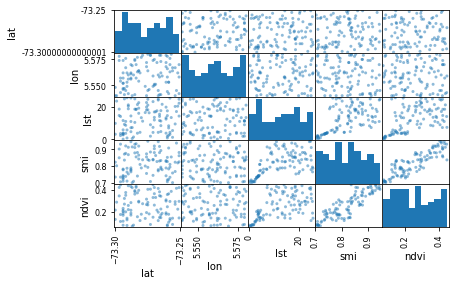

In [ ]:
pd.plotting.scatter_matrix(df6)


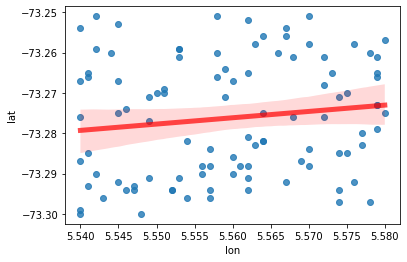

In [ ]:
sns.regplot(x=df6["lon"], y=df6["lat"], line_kws={"color":"r","alpha":0.7,"lw":5})

17-	Fraccione el gráfico de correlaciones por cuadrante y muestre las 4 figuras en un solo gráfico.

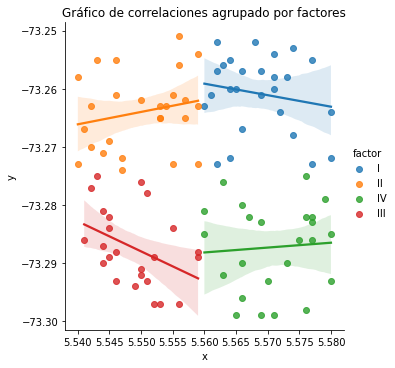

In [ ]:
corr2 = sns.lmplot(x="x", y="y", hue="factor", data=xy)
plt.title('Gráfico de correlaciones agrupado por factores')
corr2

18-	Ajuste algún modelo de regresión lineal simple entre el NDVI (respuesta) y el LST.

In [ ]:
y = df1['NDVI'] # variable dependiente
x = df1['LST'] # variable independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   NDVI   R-squared:                       0.107
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     11.80
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           0.000872
Time:                        04:22:18   Log-Likelihood:                 84.471
No. Observations:                 100   AIC:                            -164.9
Df Residuals:                      98   BIC:                            -159.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2024      0.019     10.508      0.0

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



El valor de R-squared nos indica un bajo ajuste al modelo de la variable NDVI.

19-	Ajuste un modelo de regresión multiple entre NDVI (respuesta) con  LST y SMI

In [ ]:
y = xy['ndvi'] # variable dependiente
x = xy[{'lst',"smi"}] # variable independiente 
X = sm.add_constant(x)
lm = (sm.OLS(y, X)).fit()
model_summary=lm.summary()  
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                   ndvi   R-squared:                       0.204
Model:                            OLS   Adj. R-squared:                  0.188
Method:                 Least Squares   F-statistic:                     12.46
Date:                Thu, 10 Feb 2022   Prob (F-statistic):           1.53e-05
Time:                        04:22:21   Log-Likelihood:                 90.219
No. Observations:                 100   AIC:                            -174.4
Df Residuals:                      97   BIC:                            -166.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1473      0.103     -1.425      0.1

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning:

In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only



El valor de R-squared nos indica un bajo ajuste al modelo de las variables.

20-	Tome una muestra del 80% del data.frame y **calcule la matriz de correlaciones por cuadrante. Compare con el caso de todos los datos**.

In [ ]:
muestra1 = xy.sample(80)
print(muestra1)

        x       y factor       smi      ndvi        lst
71  5.547 -73.272     II  0.751517  0.284299   4.495416
75  5.560 -73.285     IV  0.791187  0.268844  12.037513
2   5.563 -73.256      I  0.704603  0.084295   0.074571
66  5.546 -73.255     II  0.896509  0.303128  10.590520
26  5.562 -73.252      I  0.790894  0.207653   8.073107
..    ...     ...    ...       ...       ...        ...
44  5.543 -73.275    III  0.802520  0.255145  25.659451
43  5.542 -73.263     II  0.857032  0.262591   9.469281
85  5.546 -73.293    III  0.808999  0.362302   8.895734
86  5.550 -73.262     II  0.784341  0.268859  24.589513
76  5.557 -73.262     II  0.917167  0.290200   3.606577

[80 rows x 6 columns]


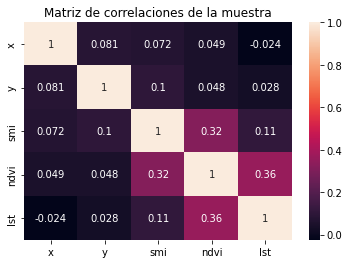

In [ ]:
muestra1.corr()
mc= muestra1.corr ()
sns.heatmap(mc, annot = True)
plt.title('Matriz de correlaciones de la muestra')
plt.show()

Una correlación positiva nos dice que las variables se mueven en la misma dirección; mientras que una correlación negativa indica que las variables se mueven en la dirección opuesta.

21-	Haga un gráfico 3D para las 3 variables ambientales

In [ ]:
d3_1 = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst')
  
d3_1.show()



22-	Haga un gráfico 3D para las 3 variables ambientales y asigne color según cuadrante

In [ ]:
d3_2 = px.scatter_3d(xy, x = 'smi', 
                    y = 'ndvi', 
                    z = 'lst',
                    color = 'factor')
  
d3_2.show()

23-	Investigue como se construye una matriz de distancias entre todos las coordenadas

In [ ]:
matriz_dis = np.stack([xy['x'],xy['y']], axis=1)
matriz_dis2=distance_matrix(matriz_dis, matriz_dis)
print(matriz_dis2)

[[0.         0.01788854 0.00608276 ... 0.03982462 0.01208305 0.0116619 ]
 [0.01788854 0.         0.01345362 ... 0.02716616 0.0212132  0.00632456]
 [0.00608276 0.01345362 0.         ... 0.03827532 0.01627882 0.00806226]
 ...
 [0.03982462 0.02716616 0.03827532 ... 0.         0.03394113 0.03036445]
 [0.01208305 0.0212132  0.01627882 ... 0.03394113 0.         0.01581139]
 [0.0116619  0.00632456 0.00806226 ... 0.03036445 0.01581139 0.        ]]


24-	Ubique el centroide de toda la nube de puntos de coordenadas y seleccione solo puntos en una ventana de radio a lo sumo igual a 2/3 de la máxima distancia en la matriz de distancias

(5.559570000000007, -73.27436999999988)


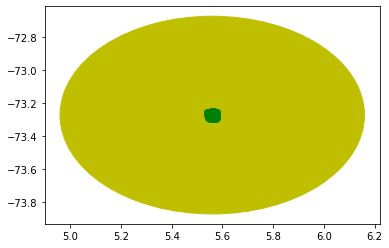

In [ ]:
coord_data= np.array(matriz_dis)
def centroid(array):
  length=array.shape[0]
  sum_x =np.sum(array[:,0])
  sum_y =np.sum(array[:,1])
  return sum_x /length ,sum_y/length

centroide = centroid(coord_data)
print(centroide)
circle = plt.Circle((centroide), 0.6, color='y')
fig, ax = plt.subplots()
ax.add_patch(circle)
plt.plot(xy['x'],xy['y'],'go')
plt.scatter(centroide[0],centroide[1],c="r")

**25-	Calcule estadísticas descriptivas en esta ventana circular (dibuje la ventana) y asigne un color diferente a los puntos dentro de esta ventana**

(5.559570000000007, -73.27436999999988)


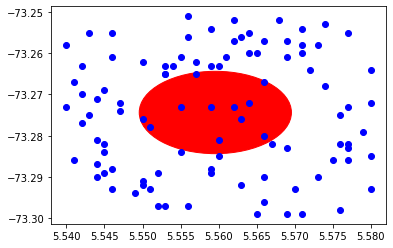

In [ ]:
centroide = centroid(matriz_dis)
print(centroide)
circle = plt.Circle((centroide), 0.01, color='r')
fig, ax = plt.subplots()
ax.add_patch(circle)

plt.plot(xy['x'],xy['y'],'bo')
plt.scatter(centroide[0],centroide[1],c="r")

In [ ]:
des=xy.describe()
print(des)

                x           y         smi        ndvi         lst
count  100.000000  100.000000  100.000000  100.000000  100.000000
mean     5.559570  -73.274370    0.823075    0.257826   11.743949
std      0.011849    0.014229    0.080140    0.110603    7.678356
min      5.540000  -73.299000    0.700785    0.060909    0.074571
25%      5.550000  -73.286250    0.749870    0.166301    5.414680
50%      5.559500  -73.273000    0.815813    0.264506   10.850598
75%      5.569000  -73.261750    0.900492    0.361476   18.303133
max      5.580000  -73.251000    0.949283    0.434085   25.731820


26- Suponga que queremos hacer un análisis de varianza para comparar la media de SMI por cuadrante. Se pide primero tomar aleatoriamente 10 datos de cada cuadrante y construir un nuevo data.frame con todas las variables pero solo con 40 filas. Utilice el análisis de varianza (modulo pingouin si desea) para comparar el índice medio de los 4 cuadrantes.

In [ ]:
F1 = xy.loc[xy["factor"] == "I"]
F2 = xy.loc[xy["factor"] == "II"]
F3 = xy.loc[xy["factor"] == "III"]
F4 = xy.loc[xy["factor"] == "IV"]
f1=F1.sample(10)
f2=F2.sample(10)
f3=F3.sample(10)
f4=F4.sample(10)
dx=pd.merge(f1, f2,how='outer' )
dx2=pd.merge(dx, f3,how='outer' )
dx3=pd.merge(dx2, f4,how='outer' )

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
mod= ols("smi ~ factor" ,data=dx3).fit()
aov_table=sm.stats.anova_lm(mod,typ=2)
print(aov_table)


            sum_sq    df         F    PR(>F)
factor    0.002512   3.0  0.117254  0.949402
Residual  0.257044  36.0       NaN       NaN


27-	Use alguna librería que permita extraer los residuales del modelo y haga su histograma

In [ ]:
waste= mod.resid
print(waste) 

0     0.017854
1    -0.075802
2     0.009268
3     0.043926
4     0.044039
5    -0.100670
6    -0.015644
7     0.051371
8     0.041672
9    -0.016013
10   -0.088107
11   -0.027714
12    0.027226
13    0.096111
14    0.018563
15    0.026409
16   -0.027510
17   -0.034616
18   -0.023279
19    0.032918
20   -0.056390
21    0.036263
22    0.097624
23   -0.011232
24    0.076674
25    0.030265
26   -0.054644
27   -0.033991
28   -0.052071
29   -0.032499
30   -0.111731
31   -0.062950
32    0.059136
33    0.067662
34    0.017132
35    0.093603
36   -0.074861
37   -0.084356
38    0.068737
39    0.027627
dtype: float64


(array([2., 4., 4., 3., 6., 1., 8., 5., 4., 3.]),
 array([-0.11173061, -0.09079516, -0.06985972, -0.04892428, -0.02798883,
        -0.00705339,  0.01388205,  0.0348175 ,  0.05575294,  0.07668838,
         0.09762383]),
 <a list of 10 Patch objects>)

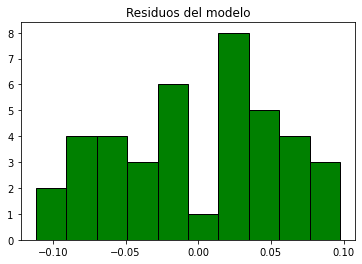

In [ ]:
hist4 = plt.hist(waste, 
         color = "green", 
         ec= "black")
plt.title('Residuos del modelo')
hist4

28-	Utilice la prueba de Shapiro para probar normalidad en los residuales

In [ ]:
# normality test
stat, p = shapiro(waste)
print('Estadísticas=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('La muestra parece Gaussiana (no se rechaza H0)')
else:
	print('La muestra no parece gaussiana (rechazar H0)')

Estadísticas=0.968, p=0.315
La muestra parece Gaussiana (no se rechaza H0)


29-	Utilice la prueba de Levine para probar igualdad de varianzas de los residuales

In [ ]:
scipy.stats.levene(waste,
                center= median)

NameError: ignored

30-	Investigue como se calcula el índice de Moran y pruebe si los residuales muestran dependencia atribuible a la autocorrelación espacial entre ellos.